# Data Preprocessing

## License and citation

Link to original data: https://archive.ics.uci.edu/dataset/571/hcv+data

This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license. Full license description can be found at:
https://creativecommons.org/licenses/by/4.0/legalcode
This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.

Citation:
Lichtinghagen,Ralf, Klawonn,Frank, and Hoffmann,Georg. (2020). HCV data. UCI Machine Learning Repository. https://doi.org/10.24432/C5D612.

## Data Loading

Step 1: Install the ucimlrepo package

In [1]:
# pip install ucimlrepo

Step 2: Import dataset "HCV data" (hepatitis C virus infection)

In [71]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
hcv_data = fetch_ucirepo(id=571) 
  
# data (as pandas dataframes) 
# features
X = hcv_data.data.features 
# target (category)
y = hcv_data.data.targets 
  
# metadata 
print(hcv_data.metadata)
  
# variable information 
print(hcv_data.variables) 

{'uci_id': 571, 'name': 'HCV data', 'repository_url': 'https://archive.ics.uci.edu/dataset/571/hcv+data', 'data_url': 'https://archive.ics.uci.edu/static/public/571/data.csv', 'abstract': 'The data set contains laboratory values of blood donors and Hepatitis C patients and demographic values like age.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 615, 'num_features': 12, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['Category'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5D612', 'creators': ['Ralf Lichtinghagen', 'Frank Klawonn', 'Georg Hoffmann'], 'intro_paper': {'title': 'Using machine learning techniques to generate laboratory diagnostic pathways—a case study', 'authors': 'Georg F. Hoffmann, A. Bietenbeck, R. Lichtinghagen, F. Kla

**Descriptions of Variables**
The features are traditional biochemical diagnostic tests, and we want to use machine learning algorithms to either validate the decision trees established by human experts or to suggest potential new diagnostic pathways.

* ALB: albumin
* ALP: 
* AST: aspartate amino-transferas
* BIL: bilirubin
* CHE: choline esterase
* CHOL: 
* CREA
* GGT: 
* PROT
* ALT: alanine amino-transferas
* Category

## Exploratory Data Analysis

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# overview of the feature data
X.head()

,Age,Sex,ALB,ALP,AST,BIL,CHE,CHOL,CREA,CGT,PROT,ALT
0,32,m,38.5,52.5,22.1,7.5,6.93,3.23,106.0,12.1,69.0,7.7
1,32,m,38.5,70.3,24.7,3.9,11.17,4.80,74.0,15.6,76.5,18.0
2,32,m,46.9,74.7,52.6,6.1,8.84,5.20,86.0,33.2,79.3,36.2
3,32,m,43.2,52.0,22.6,18.9,7.33,4.74,80.0,33.8,75.7,30.6
4,32,m,39.2,74.1,24.8,9.6,9.15,4.32,76.0,29.9,68.7,32.6


In [6]:
# summary statistics
X.describe()

,Age,ALB,ALP,AST,BIL,CHE,CHOL,CREA,CGT,PROT,ALT
count,615.000000,614.000000,597.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000,614.000000
mean,47.408130,41.620195,68.283920,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137,28.450814
std,10.055105,5.780629,26.028315,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636,25.469689
min,19.000000,14.900000,11.300000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000,0.900000
25%,39.000000,38.800000,52.500000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000,16.400000
50%,47.000000,41.950000,66.200000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000,23.000000
75%,54.000000,45.200000,80.100000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000,33.075000
max,77.000000,82.200000,416.600000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000,325.300000


In [7]:
print(f"The number of features we have is {len(X.columns)}")
print(f"The number of rows we have is {len(X.iloc[:, 0])}")

The number of features we have is 12
The number of rows we have is 615


The dataset contains 615 records and 12 features.

### Visualize Distributions

Our variables have the following types:
* Binary: Sex
* Categorical: Category
* Continuous: All the other measurements

We can use bar plots, box plots and histograms to visualize the distributions.

In [59]:
def patient_info_histograms(df, y):
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 15))
    fig.suptitle('Distribution Plots', fontsize=16)

    # Plot for 'Category' (Bar Chart)
    cat_counts = y['Category'].value_counts()
    axes[0, 0].bar(cat_counts.index, cat_counts.values, color='lightgreen')
    axes[0, 0].set_title('Category Distribution')
    axes[0, 0].set_xlabel('Category')
    axes[0, 0].set_ylabel('Count')

    # Plot for 'Sex' (Bar Chart)
    gender_counts = df['Sex'].value_counts()
    axes[0, 1].bar(gender_counts.index, gender_counts.values, color='lightcoral')
    axes[0, 1].set_title('Sex Distribution')
    axes[0, 1].set_xlabel('Sex')
    axes[0, 1].set_ylabel('Count')

    # Plot for 'ALP' (Histogram)
    axes[1, 0].hist(df['ALP'], bins=12, color='skyblue', edgecolor='black')
    axes[1, 0].set_title('ALP Histogram')
    axes[1, 0].set_xlabel('ALP')
    axes[0, 0].set_ylabel('Frequency')

    # Plot for 'CHOL' (Histogram)
    axes[1, 1].hist(df['CHOL'], bins=12, color='lightseagreen', edgecolor='black')
    axes[1, 1].set_title('CHOL Histogram')
    axes[1, 1].set_xlabel('CHOL')
    axes[1, 1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.savefig("../figures/Patient_info Distribution Plots.jpg")

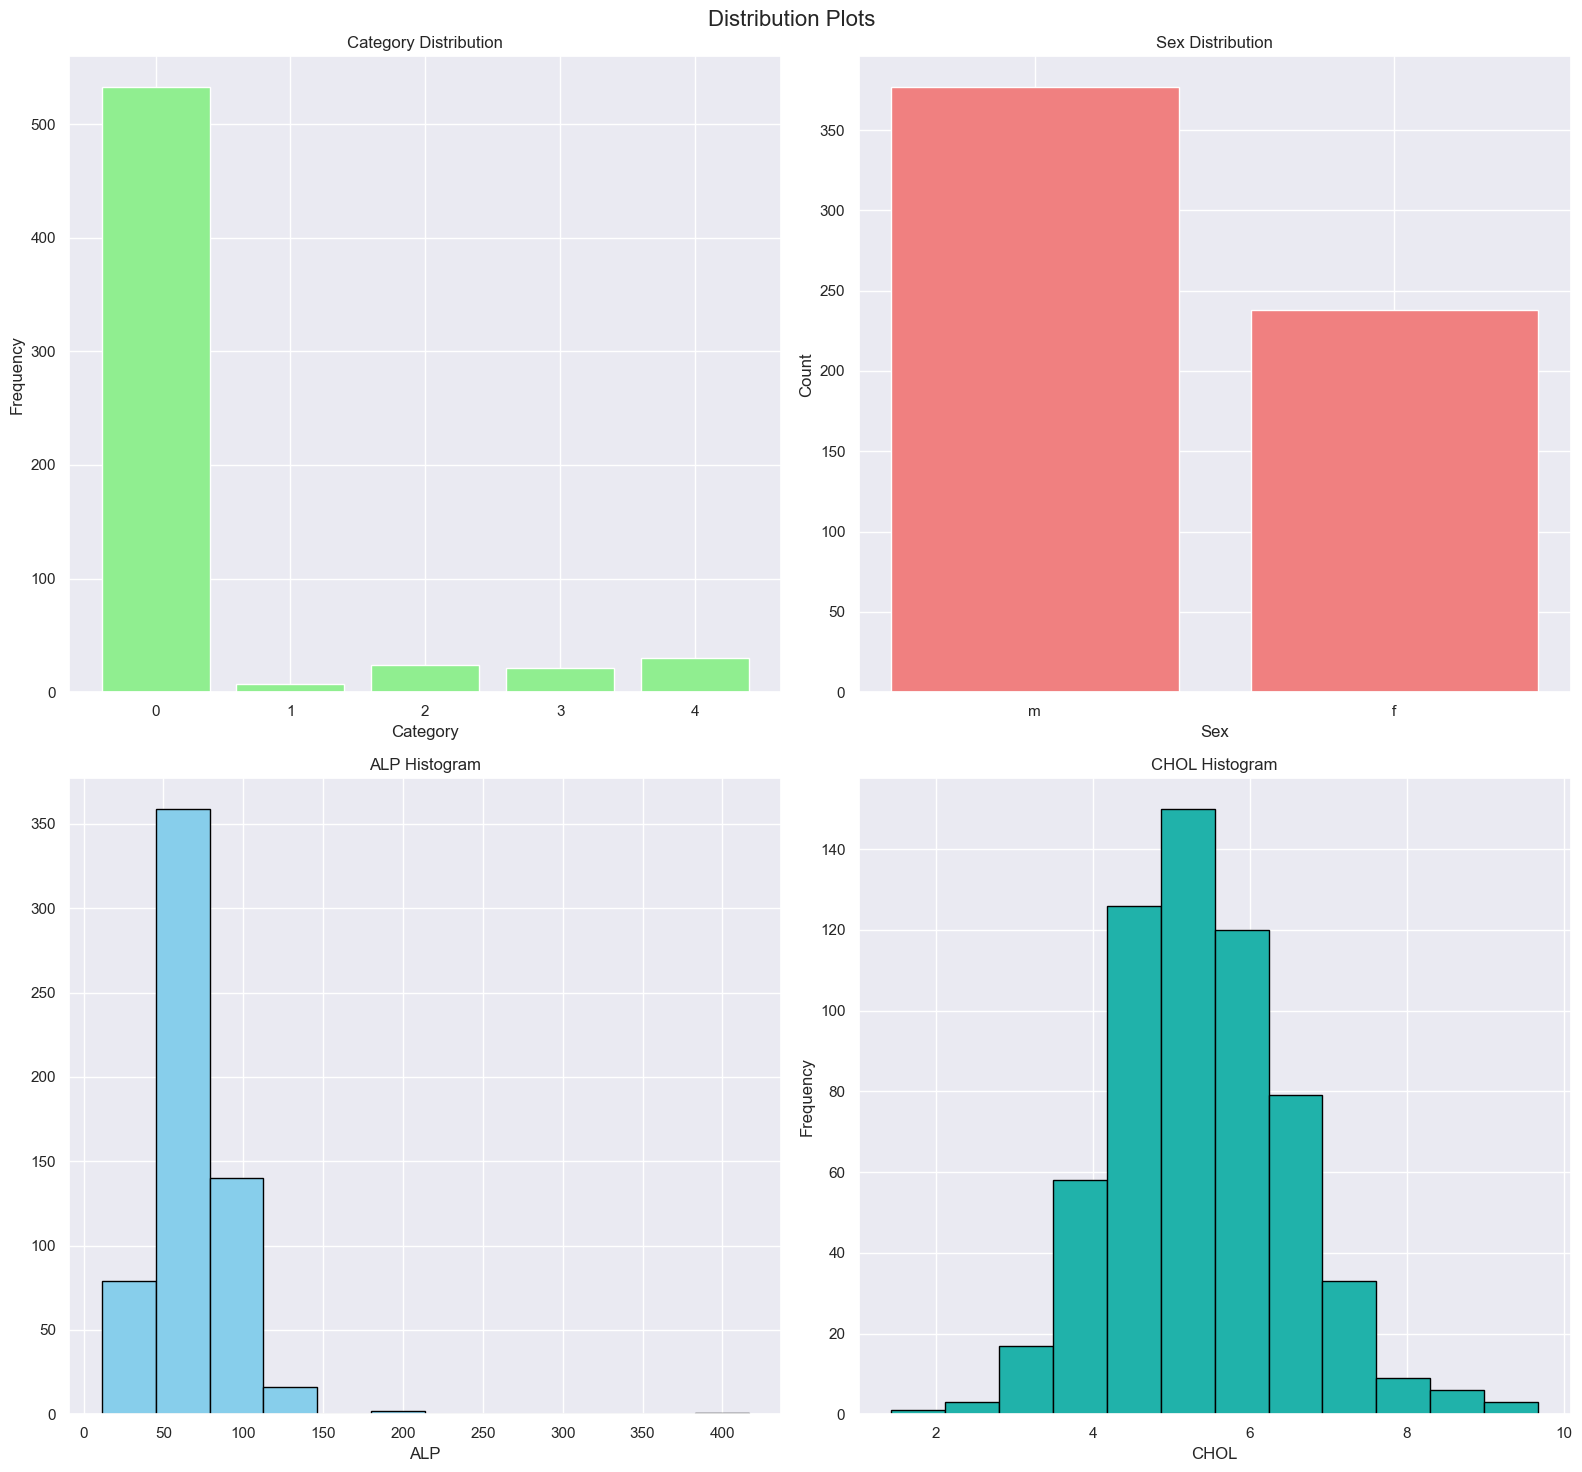

In [60]:
patient_info_histograms(X, y)

According to "Category Distribution", we can observe that our target variable is highly imbalanced, with the majority of patients in the category "Blood Donor". The sex distribution shows that the male is the dominant sex group. We select 2 continuous features, ALP and CHOL, to plot histograms. The histograms are both slighly right skewed, and we can see some potential outliers (at 200 and 400) for ALP.

In [17]:
# allow to select feature names
# plot boxplot on the same graph
def boxplot_selected(df, feature_names): 
    fig, ax = plt.subplots()
    pos = 0
    for name in feature_names:
        ax.boxplot(df[name], positions = [pos], labels=[name])
        pos += 1
    
    ax.set_xlabel('Features')
    ax.set_ylabel('Values')
    ax.set_title(f"Boxplots for {'/'.join(feature_names)}")

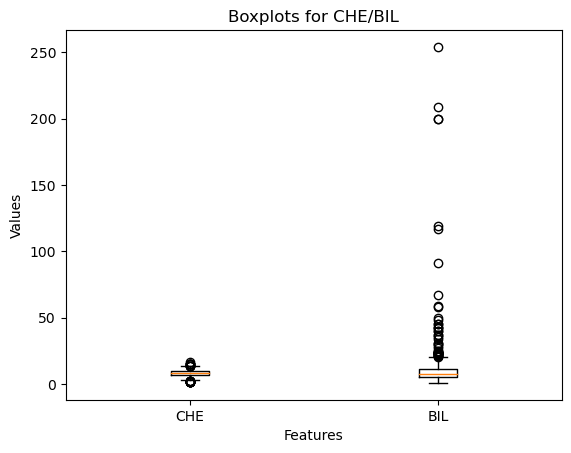

In [20]:
boxplot_selected(X, ['CHE', 'BIL'])

According to the boxplots of CHE and BIL, although their median values are close to each other, we can see that their distributions are very different. BIL has many data points larger than the third quantile. The values of CHE are all distributed closely around the median.

#### Correlation Analysis

/Users/cynthia/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


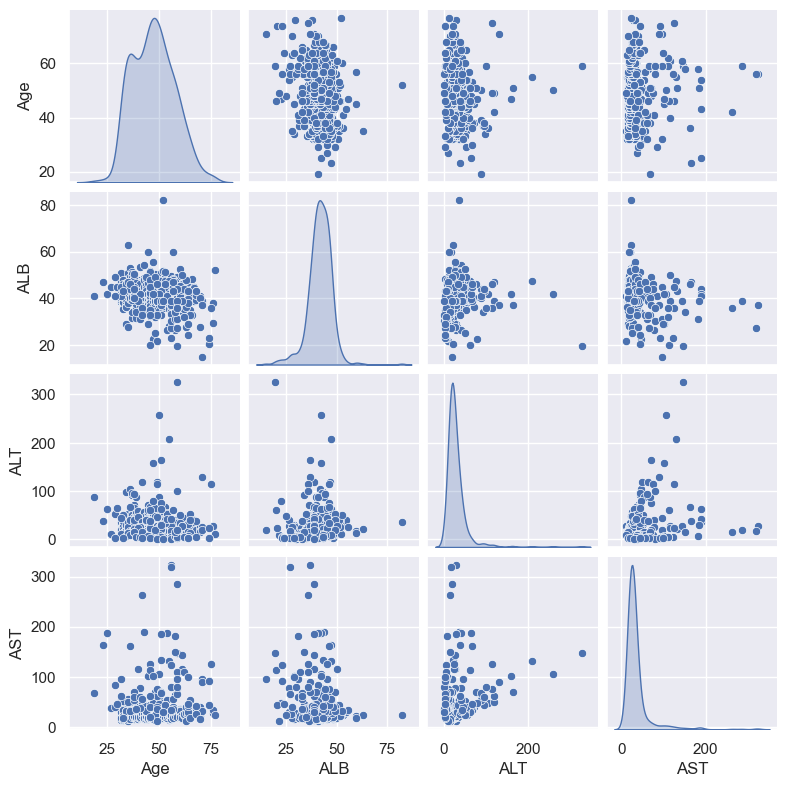

In [21]:
# selected features
columns = ["Age", 'ALB', "ALT", "AST"]
sns.set()
sns.pairplot(X[columns],size = 2 ,kind ='scatter',diag_kind='kde')

The correlation plots do not show any significant correlation, and we can suppose that these features are relatively independently pairwisely.

## Data Cleaning

### Missing values

In [40]:
print("Compute the number of missing values for each column:")
X.isna().sum()

Compute the number of missing values for each column:


Age      0
Sex      0
ALB      1
ALP     18
AST      0
BIL      0
CHE      0
CHOL    10
CREA     0
CGT      0
PROT     1
ALT      1
dtype: int64

In [72]:
# get the number of missing values
total = X.isna().sum().sort_values(ascending=False)
percent = (X.isnull().sum()/X.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_data

,Total Missing Count,% of Total Observations
ALP,18,0.029268
CHOL,10,0.016260
ALB,1,0.001626
PROT,1,0.001626
ALT,1,0.001626
Age,0,0.000000
Sex,0,0.000000
AST,0,0.000000
BIL,0,0.000000
CHE,0,0.000000


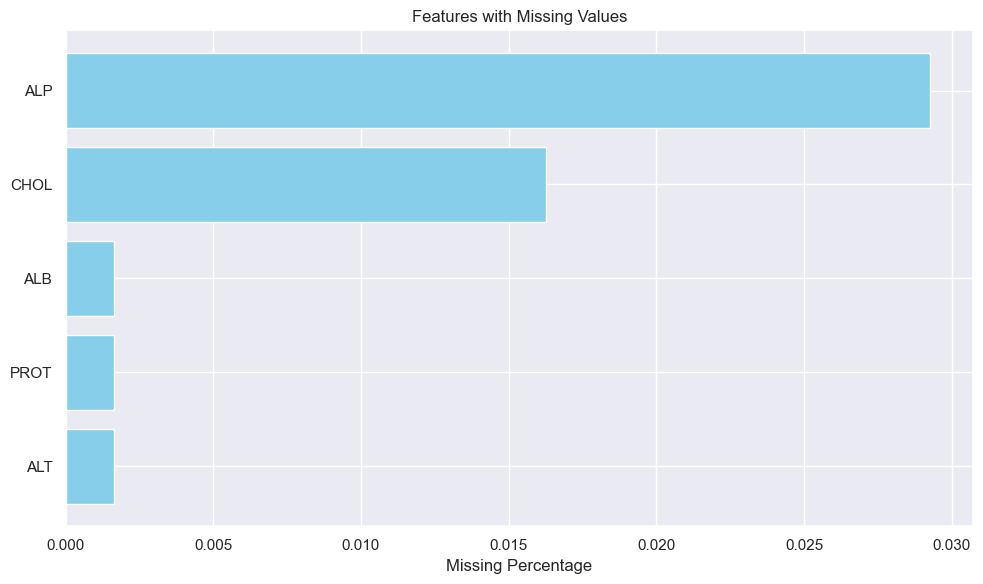

In [73]:
# Create a horizontal bar plot for the top ten missing features
top_missing_data = missing_data.iloc[:5, 1]
top_missing_data
plt.figure(figsize=(10, 6))
plt.barh(top_missing_data.index, top_missing_data, color='skyblue')
plt.xlabel('Missing Percentage')
plt.title('Features with Missing Values')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest missing feature at the top
plt.tight_layout()
plt.savefig("../figures/Features with Missing Values.jpg")

The figure above shows the percentage of missing values for 5 features. The proportion of missing values is not very large, so there is no need to delete any features. Also, we may assume that missing value imputation may not have very significant influence on the original distribution and variance. Since all the features with missing values are continuous variables, we may try to replace missing values with median.

In [74]:
def handle_missing(df: pd.DataFrame):
    df_filled = df.fillna(df.median())
    return df_filled

In [75]:
X_filled = handle_missing(X)

/var/folders/ch/1v21vldj0m1dk5lxd7kjbrh80000gn/T/ipykernel_4391/1479313281.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled = df.fillna(df.median())


In [76]:
(X_filled.isna().sum()).sum()

0

In [77]:
category_mapping = {
    '0=Blood Donor': 0,
    '0s=suspect Blood Donor': 0,
    '1=Hepatitis': 1,
    '2=Fibrosis': 1,
    '3=Cirrhosis': 1
}
y['Category'] = y['Category'].map(category_mapping)
y['Category'].astype('category')
y['Category']

/var/folders/ch/1v21vldj0m1dk5lxd7kjbrh80000gn/T/ipykernel_4391/527075107.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Category'] = y['Category'].map(category_mapping)


0      0
1      0
2      0
3      0
4      0
      ..
610    1
611    1
612    1
613    1
614    1
Name: Category, Length: 615, dtype: int64

In [78]:
# lable sex
category_mapping = {
    'f': 0,
    'm': 1
}
X_filled['Sex'] = X_filled['Sex'].map(category_mapping)
X_filled['Sex'] = X_filled['Sex'].astype('category')

In [79]:
X_filled

,Age,Sex,ALB,ALP,AST,BIL,CHE,CHOL,CREA,CGT,PROT,ALT
0,32,1,38.5,52.5,22.1,7.5,6.93,3.23,106.0,12.1,69.0,7.7
1,32,1,38.5,70.3,24.7,3.9,11.17,4.80,74.0,15.6,76.5,18.0
2,32,1,46.9,74.7,52.6,6.1,8.84,5.20,86.0,33.2,79.3,36.2
3,32,1,43.2,52.0,22.6,18.9,7.33,4.74,80.0,33.8,75.7,30.6
4,32,1,39.2,74.1,24.8,9.6,9.15,4.32,76.0,29.9,68.7,32.6
...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,0,32.0,416.6,110.3,50.0,5.57,6.30,55.7,650.9,68.5,5.9
611,64,0,24.0,102.8,44.4,20.0,1.54,3.02,63.0,35.9,71.3,2.9
612,64,0,29.0,87.3,99.0,48.0,1.66,3.63,66.7,64.2,82.0,3.5
613,46,0,33.0,66.2,62.0,20.0,3.56,4.20,52.0,50.0,71.0,39.0


## Cleaned DataFrame Output

In [80]:
output = X_filled.copy()
output['Category'] = y['Category']
output.head()

,Age,Sex,ALB,ALP,AST,BIL,CHE,CHOL,CREA,CGT,PROT,ALT,Category
0,32,1,38.5,52.5,22.1,7.5,6.93,3.23,106.0,12.1,69.0,7.7,0
1,32,1,38.5,70.3,24.7,3.9,11.17,4.80,74.0,15.6,76.5,18.0,0
2,32,1,46.9,74.7,52.6,6.1,8.84,5.20,86.0,33.2,79.3,36.2,0
3,32,1,43.2,52.0,22.6,18.9,7.33,4.74,80.0,33.8,75.7,30.6,0
4,32,1,39.2,74.1,24.8,9.6,9.15,4.32,76.0,29.9,68.7,32.6,0


In [56]:
# export dataframe
output.to_csv("../data/processed_hcvdat.csv")